# Match Point Registration
## Afine Transformation

An affine transformation can be expressed by vector addition and matrix multiplication 
as shown in Equation:,

\begin{equation}
    \begin{bmatrix}
      x' \\ y'
    \end{bmatrix}
    =
    S
    \begin{bmatrix}
      \cos (\theta) & -\sin (\theta)\\
      \sin (\theta) & \cos(\theta)
    \end{bmatrix}
    \begin{bmatrix}
      x \\ y
    \end{bmatrix}
    +
    \begin{bmatrix}
      a_5 \\ a_6
    \end{bmatrix}
    \label{eqn:maffine}
\end{equation}

where S is the scaling parameter. By multiplying S with the rotation matrix, 
Equation above can be written as:

\begin{equation}
    \begin{bmatrix}
      x' \\ y'
    \end{bmatrix}
    =
    \begin{bmatrix}
      a_1 & a_2\\
      a_3 & a_4
    \end{bmatrix}
    \begin{bmatrix}
      x \\ y
    \end{bmatrix}
    +
    \begin{bmatrix}
      a_5 \\ a_6
    \end{bmatrix}
    \label{eqn:maffine2}
\end{equation}

Finally, by using homogeneous coordinates, the affine transformation can be 
rewritten as Equation:
\begin{equation}
    \begin{bmatrix}
      x' \\ y' \\1
    \end{bmatrix}
    =
    \begin{bmatrix}
      a_1 & a_2 & a_5 \\
      a_3 & a_4 & a_6\\
      0   &  0  &  1
    \end{bmatrix}
    \begin{bmatrix}
      x \\ y \\1
    \end{bmatrix}.
    \label{eqn:maffine3}
\end{equation}

The affine transform has six parameters: $a_0,\ a_1,\ a_2,\ a_3,\ a_4$, and $a_5$. $a_5$ and $a_6$ specify the translation and $a_1$, $a_2$, $a_3$, and $a_4$ perform rotation, scaling, stretching, and 
shearing.

Now, we can define the transformation $T_w$ as the matrix in Equation above 
with parameters $w = [a_1,\ a_2,\ a_3,\ a_4,\ a_5,\ a_6] \in \mathbb{R}^6 $. 

Thus, the Evolutionary Centers Algorithm approximate an affine transformation $w = [a_1,\ a_2,\ a_3,\ a_4,\ a_5,\ a_6]$.

### Experiments

In [2]:
using MAT
import DelimitedFiles.writedlm
using Plots

pyplot(legend=false)
include("../ecapr.jl")

ecapr (generic function with 1 method)

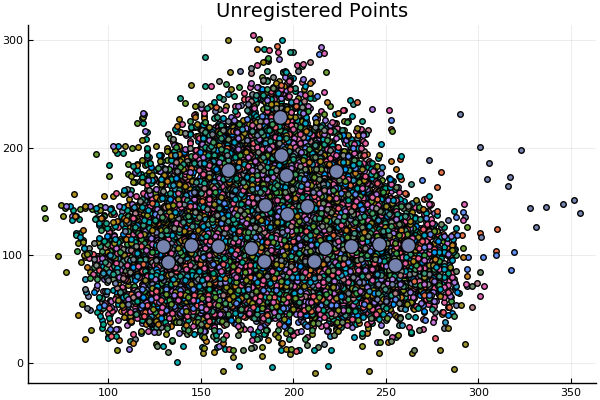

In [7]:
matrix = matread("matriz_puntos.mat")["matriz"]


plt = scatter(matrix[1,1:2:end], matrix[1,2:2:end], title = "Unregistered Points")

for i = 1:size(matrix, 1)
    scatter!(matrix[i,1:2:end], matrix[i,2:2:end])
end

scatter!(matrix[1,1:2:end], matrix[1,2:2:end], markersize=10)
plt

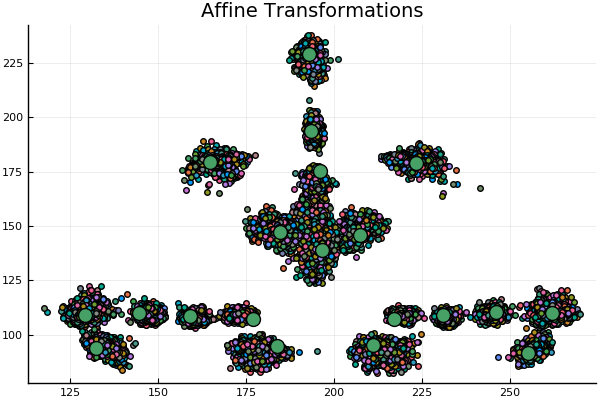

In [4]:
Y = zeros(div(size(matrix, 2), 2), 2)
Y[:,1] = matrix[1,1:2:end]
Y[:,2] = matrix[1,2:2:end]

affines = zeros(size(matrix, 1),6)
matrix_approx = copy(matrix)

X = zeros(div(size(matrix, 2), 2), 2)

plt=plot(title="Affine Transformations")

for i = 1:size(matrix,1)
    X[:,1] = matrix[i,1:2:end]
    X[:,2] = matrix[i,2:2:end]
    p, Y_approx = ecapr(X', Y'; method=:affine, showResults = false)
    matrix_approx[i,1:2:end] = Y_approx[:,1]
    matrix_approx[i,2:2:end] = Y_approx[:,2]

    affines[i,:] = p
    scatter!(Y_approx[:,1], Y_approx[:,2])
    
end
writedlm("affine.csv", affines, ',')
writedlm("matrix_affine.csv", matrix_approx, ',')

scatter!(Y[:,1], Y[:,2], markersize=10)

## Quadratic Transformations

Here, we present a polynomial approach for point set registration for getting 
accuracy. Fist we define a quadratic polynomial transformation for $\mathbb{R}^2$ 
but can be easily  extended for $\mathbb{R}^3$:

\begin{eqnarray}
  \begin{bmatrix}
      x' \\ y'
  \end{bmatrix}
  &=& 
  \begin{bmatrix}
    a_1 & a_2 & \cdots & a_6 \\
    b_1 & b_2 & \cdots & b_{6} \\
  \end{bmatrix}
  \begin{bmatrix}
    y^2 \\
    y^2 \\
    xy  \\
    y   \\
    x   \\
    1   \\
  \end{bmatrix}
  \label{eqn:tv}
  \\
  &=&
  \begin{bmatrix}
       a_1x^2 +
       a_2 y^2 +
       a_3 xy +
       a_4 x +
       a_5y +
       a_6  \\
       b_1x^2 +
       b_2 y^2 +
       b_3 xy +
       b_4 x +
       b_5y +
       b_6 
      \end{bmatrix}.
\end{eqnarray}


Note that if $a_1 = a_2 = a_3 = b_1 = b_2 = b_3 = 0$, then we have an affine transformation. 

Finally, we can define the quadratic transformation as $T_v$ as the  matrix in 
Equation above where $v = [a_1, \ldots, \ a_6, \ b_1,  \ldots, \ b_6] \in \mathbb{R}^{12}$. 



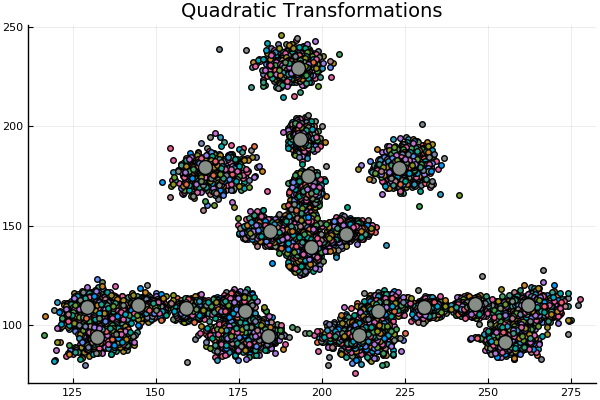

In [6]:
plt=scatter(Y[:,1], Y[:,2], markersize=10)

quadratics = zeros(size(matrix, 1),12)
matrix_approx = copy(matrix)

plot(title="Quadratic Transformations")

for i = 2:size(matrix,1)
    X[:,1] = matrix[i,1:2:end]
    X[:,2] = matrix[i,2:2:end]
    p, Y_approx = ecapr(X', Y'; method=:quadratic, showResults = false)
    matrix_approx[i,1:2:end] = Y_approx[:,1]
    matrix_approx[i,2:2:end] = Y_approx[:,2]
    quadratics[i,:] = p
    scatter!(Y_approx[:,1], Y_approx[:,2])
end
writedlm("quadratic.csv", quadratics, ',')
writedlm("matrix_quadratic.csv", matrix_approx, ',')

scatter!(Y[:,1], Y[:,2], markersize=10)